# Networks

##  Introduction 

This tutorial gives an overview of the microwave network analysis 
features of **skrf**.  For this tutorial, and the rest of the scikit-rf documentation, it is  assumed that **skrf** has been imported as `rf`. Whether or not you follow this convention in your own code is up to you.

In [1]:
import skrf as rf
from pylab import *

If this produces an import error, please see [Installation ](Installation.ipynb).

## Creating Networks


**skrf** provides an object for a N-port microwave [Network](../api/network.rst). A [Network](../api/network.rst) can be created in a number of ways. One way is from data stored in a touchstone file. 

In [2]:
from skrf import Network, Frequency

ring_slot = Network('data/ring slot.s2p')

	
A short description of the network will be printed out if entered onto the command line
	

In [3]:
ring_slot

2-Port Network: 'ring slot',  75.0-110.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j]

Networks can also be created by directly passing values for the `frequency`, `s`-parameters  and  port impedance `z0`. 

In [4]:
freq = Frequency(1,10,101,'ghz')
ntwk = Network(frequency=freq, s= [-1, 1j, 0], z0=50, name='slippy') 
ntwk

1-Port Network: 'slippy',  1.0-10.0 GHz, 101 pts, z0=[50.+0.j]

	
See  [Network](../api/network.rst)  for more information on network creation.

## Basic Properties

	
The basic attributes of a microwave [Network](../api/network.rst) are provided by the 
following properties :

* `Network.s` : Scattering Parameter matrix. 
* `Network.z0`  : Port Characteristic Impedance matrix.
* `Network.frequency`  : Frequency Object. 

The [Network](../api/network.rst) object has numerous other properties and methods. If you are using IPython, then these properties and methods can be 'tabbed' out on the command line. 


	In [1]: ring_slot.s<TAB>
	ring_slot.line.s              ring_slot.s_arcl         ring_slot.s_im
	ring_slot.line.s11            ring_slot.s_arcl_unwrap  ring_slot.s_mag
	...


All of the network parameters are represented internally as complex `numpy.ndarray`. The s-parameters are of shape (nfreq, nport, nport)

In [5]:
shape(ring_slot.s)

(201, 2, 2)

## Slicing

You can  slice the `Network.s` attribute any way you want.

In [6]:
ring_slot.s[:11,1,0]  # get first 10 values of S21

array([0.6134571 +0.36678139j, 0.6218194 +0.36403169j,
       0.63024301+0.36109574j, 0.63872415+0.3579682j ,
       0.64725874+0.35464377j, 0.65584238+0.35111711j,
       0.66447037+0.34738295j, 0.6731377 +0.34343602j,
       0.68183901+0.33927115j, 0.69056862+0.33488321j,
       0.6993205 +0.3302672j ])

Slicing by frequency can also be done directly on Network objects like so 

In [7]:
ring_slot[0:10] #  Network for the first 10 frequency points

2-Port Network: 'ring slot',  75.0-76.575 GHz, 10 pts, z0=[50.+0.j 50.+0.j]

or  with a human friendly string,

In [8]:
ring_slot['80-90ghz']

2-Port Network: 'ring slot',  80.075-90.05 GHz, 58 pts, z0=[50.+0.j 50.+0.j]

Notice that slicing directly on a Network **returns a Network**.  So, a nice way to express slicing in both dimensions is 

In [9]:
ring_slot.s11['80-90ghz'] 

1-Port Network: 'ring slot',  80.075-90.05 GHz, 58 pts, z0=[50.+0.j]

## Plotting 

Amongst other things, the methods of the [Network](../api/network.rst) class provide convenient ways to plot components of the network parameters, 

* `Network.plot_s_db` : plot magnitude of s-parameters in log scale
* `Network.plot_s_deg` : plot phase of s-parameters in degrees
* `Network.plot_s_smith` : plot complex s-parameters on Smith Chart
* ...

If you would like to use skrf's plot styling,

In [32]:
%matplotlib inline 
rf.stylely()

C:\Users\JH218595\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\JH218595\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\JH218595\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


	
To plot all four s-parameters of the `ring_slot` on the Smith Chart.

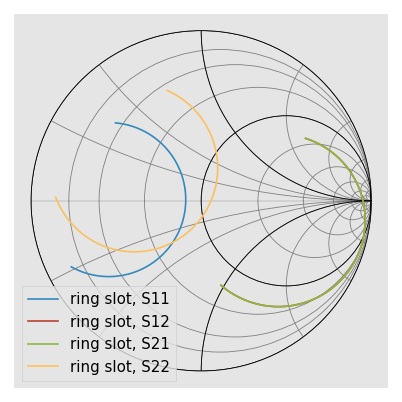

In [33]:
ring_slot.plot_s_smith()

Combining this with the slicing features, 

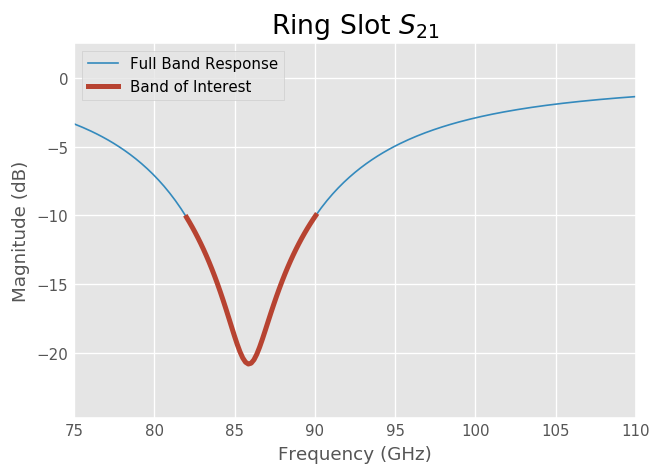

In [34]:
from matplotlib import pyplot as plt

plt.title('Ring Slot $S_{21}$')

ring_slot.s11.plot_s_db(label='Full Band Response')
ring_slot.s11['82-90ghz'].plot_s_db(lw=3,label='Band of Interest')

For more detailed information about plotting see [Plotting](Plotting.ipynb).   


## Operators

### Arithmetic Operations 
	
Element-wise mathematical operations on the scattering parameter matrices are accessible through overloaded operators. To illustrate their usage, load a couple  Networks stored in the `data` module. 

In [13]:
from skrf.data import wr2p2_short as short 
from skrf.data import wr2p2_delayshort as delayshort 


short - delayshort
short + delayshort
short * delayshort
short / delayshort


1-Port Network: 'wr2p2,short',  330.0-500.0 GHz, 201 pts, z0=[50.+0.j]

All of these operations return [Network](../api/network.rst) types.  For example, to plot the complex difference  between  `short` and `delay_short`,

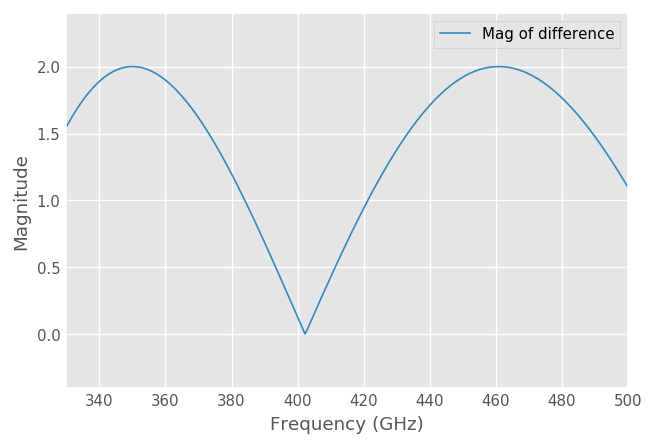

In [35]:
difference = (short - delayshort)
difference.plot_s_mag(label='Mag of difference')

Another common application is calculating the phase difference using the division operator,

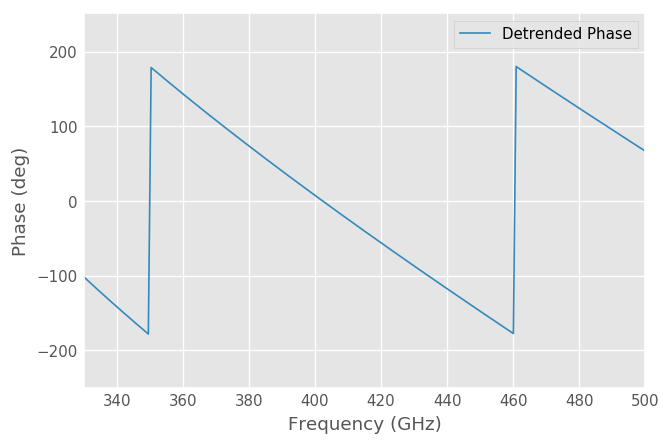

In [36]:
(delayshort/short).plot_s_deg(label='Detrended Phase')

Linear operators can also be used with scalars or an `numpy.ndarray`  that ais the same length as the [Network](../api/network.rst). 

In [16]:
hopen = (short*-1)
hopen.s[:3,...]

array([[[1.-0.j]],

       [[1.-0.j]],

       [[1.-0.j]]])

In [17]:
rando =  hopen *rand(len(hopen))
rando.s[:3,...]

array([[[0.3364056 +0.j]],

       [[0.58796893+0.j]],

       [[0.11174988+0.j]]])

### Cascading and De-embedding

Cascading and de-embeding 2-port Networks can also be done though operators. The `cascade` function can be called through the power operator,  `**`. To calculate a new network which is the cascaded connection of the two individual Networks `line` and `short`, 

In [18]:
short = rf.data.wr2p2_short
line = rf.data.wr2p2_line
delayshort = line ** short

De-embedding  can be accomplished by cascading the *inverse* of a network. The inverse of a network is accessed through the property `Network.inv`. To de-embed the `short` from `delay_short`,

In [19]:
short_2 = line.inv ** delayshort

short_2 == short

True

Comparison operators also work with networks.

## Connecting Multi-ports 

**skrf** supports the connection of arbitrary ports of N-port networks. It accomplishes this using an algorithm called sub-network growth[[1]](#References),  available through the function `connect()`. Terminating one port of an ideal 3-way splitter can be done like so,

In [20]:
tee = rf.data.tee
tee

3-Port Network: 'tee',  330.0-500.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j 50.+0.j]

	

To connect port `1` of the tee, to port `0` of the delay short,

In [21]:
terminated_tee = rf.connect(tee,1,delayshort,0)
terminated_tee

2-Port Network: 'tee',  330.0-500.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j]

Note that this function takes into account port impedances. If two connected ports have different port impedances,  an appropriate impedance mismatch is inserted.
	
## Interpolation and Concatenation

A common need is to change the number of frequency points of a [Network](../api/network.rst). To use the operators and cascading functions the networks involved must have matching frequencies, for instance. If two networks have different frequency information, then an error will be raised, 

In [22]:
from skrf.data import wr2p2_line1 as line1

line1

2-Port Network: 'wr2p2,line1',  330.0-500.0 GHz, 101 pts, z0=[50.+0.j 50.+0.j]

    line1+line
    
    ---------------------------------------------------------------------------
    IndexError                                Traceback (most recent call last)
    <ipython-input-49-82040f7eab08> in <module>()
    ----> 1 line1+line

    /home/alex/code/scikit-rf/skrf/network.py in __add__(self, other)
        500 
        501         if isinstance(other, Network):
    --> 502             self.__compatable_for_scalar_operation_test(other)
        503             result.s = self.s + other.s
        504         else:

    /home/alex/code/scikit-rf/skrf/network.py in __compatable_for_scalar_operation_test(self, other)
        701         '''
        702         if other.frequency  != self.frequency:
    --> 703             raise IndexError('Networks must have same frequency. See `Network.interpolate`')
        704 
        705         if other.s.shape != self.s.shape:

    IndexError: Networks must have same frequency. See `Network.interpolate`


	
This problem can be solved by interpolating one of Networks allong the frequency axis using `Network.resample`. 

In [23]:
line1.resample(201)
line1

2-Port Network: 'wr2p2,line1',  330.0-500.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j]

And now we can do things

In [24]:
line1 + line

2-Port Network: 'wr2p2,line1',  330.0-500.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j]

You can also interpolate from a `Frequency` object. For example, 

In [25]:
line.interpolate_from_f(line1.frequency)

2-Port Network: 'wr2p2,line',  330.0-500.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j]

A related application is the need to combine Networks which cover different frequency ranges. Two  Netwoks can be concatenated (aka stitched) together using `stitch`, which  concatenates networks along their frequency axis. To combine a WR-2.2 Network with a WR-1.5 Network, 
 

In [26]:
from skrf.data import wr2p2_line, wr1p5_line

big_line = rf.stitch(wr2p2_line, wr1p5_line)
big_line

2-Port Network: 'wr2p2,line',  330.0-750.0 GHz, 402 pts, z0=[50.+0.j 50.+0.j]

## Reading and Writing 


For long term data storage, **skrf** has support for reading and partial support for writing  [touchstone file format](http://en.wikipedia.org/wiki/Touchstone_file). Reading is accomplished with the Network initializer as shown above,  and writing with the method  `Network.write_touchstone()`.

For **temporary** data storage, **skrf** object can be [pickled](http://docs.python.org/2/library/pickle.html) with  the functions `skrf.io.general.read` and `skrf.io.general.write`.  The reason to use temporary pickles over touchstones is that they store all attributes of a network, while touchstone files only store partial information. 

In [27]:
rf.write('data/myline.ntwk',line) # write out Network using pickle

In [28]:
ntwk = Network('data/myline.ntwk') # read Network using pickle

Frequently there is an entire directory of files that need to be analyzed. `rf.read_all`  creates Networks from all files in a directory quickly.  To load all **skrf** files in the `data/` directory which contain the string `'wr2p2'`.

In [29]:
dict_o_ntwks = rf.read_all(rf.data.pwd, contains = 'wr2p2')
dict_o_ntwks

{'wr2p2,delayshort': 1-Port Network: 'wr2p2,delayshort',  330.0-500.0 GHz, 201 pts, z0=[50.+0.j],
 'wr2p2,line': 2-Port Network: 'wr2p2,line',  330.0-500.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j],
 'wr2p2,line1': 2-Port Network: 'wr2p2,line1',  330.0-500.0 GHz, 101 pts, z0=[50.+0.j 50.+0.j],
 'wr2p2,short': 1-Port Network: 'wr2p2,short',  330.0-500.0 GHz, 201 pts, z0=[50.+0.j]}

## Other Parameters	

This tutorial focuses on s-parameters, but other network representations are available as well. Impedance and Admittance Parameters can be accessed through the parameters `Network.z` and `Network.y`, respectively. Scalar components of complex parameters, such as  `Network.z_re`, `Network.z_im` and plotting methods are available as well.

Other parameters are only available for 2-port networks, such as wave cascading parameters (`Network.t`), and  ABCD-parameters (`Network.a`)

In [30]:
ring_slot.z[:3,...]

array([[[0.88442687+28.15350224j, 0.94703504+30.46757222j],
        [0.94703504+30.46757222j, 1.0434417 +43.45766805j]],

       [[0.91624901+28.72415928j, 0.98188607+31.09594438j],
        [0.98188607+31.09594438j, 1.08168411+44.17642274j]],

       [[0.94991736+29.31694632j, 1.01876516+31.74874257j],
        [1.01876516+31.74874257j, 1.12215451+44.92215712j]]])

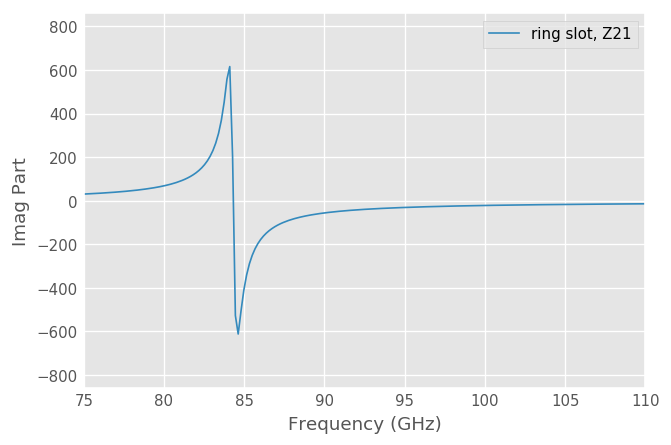

In [37]:
ring_slot.plot_z_im(m=1,n=0)

##  Conclusion

There are many more features of Networks that can be found in [networks](networks.rst)

## References


[1] Compton, R.C.; , "Perspectives in microwave circuit analysis," Circuits and Systems, 1989., Proceedings of the 32nd Midwest Symposium on , vol., no., pp.716-718 vol.2, 14-16 Aug 1989. URL: http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=101955&isnumber=3167
